# Übungsaufgaben
Importieren Sie zuerst die benötigten Bibliotheken und die Tests für dieses Übungsblatt.

In [ ]:
import pandas as pd
import numpy as np

# Aufgabe 1
Laden Sie den Datensatz aus der Datei `disney_plus_titles.csv`. Die Daten setzen sich zusammen aus dem Datensatz [Disney+ Movies and TV Shows](https://www.kaggle.com/code/werador/disney-data-analysis/data) und Daten aus der TMDb API.

In [ ]:
df = pd.read_csv('disney_plus_titles.csv')
df

## Aufgabe 2
Die Spalte `tmdb_ref` enthält zu jedem Film und jeder Serie einen Pfad zur entsprechenden TMDb-Seite. Benutzen Sie diese Angabe (**ohne** HTTP-Anfragen an TMDb zu senden), um die Werte der Spalte `type` zu korrigieren.

In [ ]:
df_type = df.copy()

df_type['type'] = df_type['tmdb_ref'].str.split('/').str[1].replace({
    'movie': 'Movie',
    'tv': 'TV Show'
})

df_type

## Aufgabe 3
Die Spalte `release` enthält in diesem Ausschnitt die Veröffentlichung aller Werke auf den Tag genau. Allerdings können Sie beobachten, dass die Datumsformate nicht einheitlich sind. Vereinheitlichen Sie alle Datumsformate der Spalte in die Form `YYYY-MM-DD`. Konvertieren Sie die Spalte anschließend zum Datentyp `datetime64`.

In [ ]:
df_release = df.copy()

def to_yyyymmdd(x):
    if x is np.nan or isinstance(x, float):
        return x
    if len(x) == 10:
        return x

    year = int(x[:2])
    if year <= 30:
        year += 2000
    else:
        year += 1900

    return f'{year}-{x[2:]}'

df_release['release'] = df_release['release'].map(to_yyyymmdd)
df_release['release'] = pd.to_datetime(df_release['release'])

df_release

## Aufgabe 4
Ersetzen Sie die Spalte `revenue` nach folgendem Schema:
- `unbekannt`: Das Einspielergebnis ist unbekannt. (Dazu gehören nicht nur `NaN`-Werte!)
- `niedrig`: Das Einspielergebnis beträgt weniger als oder exakt 40 Millionen USD.
- `mittel`: Das Einspielergebnis beträgt weniger als oder exakt 400 Millionen USD.
- `hoch`: Das Einspielergebnis beträgt mehr als 400 Millionen USD.

In [ ]:
df_grouped = df.copy()

df_grouped['revenue'] = df_grouped['revenue'].replace(0, np.nan)
df_grouped['revenue'] = pd.cut(df_grouped['revenue'],
                               [0, 40_000_000, 400_000_000, df_grouped['revenue'].max()],
                               labels=['niedrig', 'mittel', 'hoch'])
df_grouped['revenue'] = df_grouped['revenue'].cat.add_categories(['unbekannt']).fillna('unbekannt')

df_grouped

## Aufgabe 5
Berechnen Sie die durchschnittliche Laufzeit getrennt nach Filmen und Serien. Im Fall von Serien ist die durchschnittliche Laufzeit pro Episode gefragt.

**Hinweis**: Es sind einige Werke enthalten, deren Laufzeit mit $0$ angegeben wird.

In [ ]:
df2 = df.copy()

df2['runtime'] = df2['runtime'].replace(0, np.nan)
df2['episode_count'] = df2['episode_count'].fillna(1)
df2['avg_runtime'] = df2['runtime'] / df2['episode_count']

result = df2.groupby('type')['avg_runtime'].mean()

avg_movie_runtime = result['Movie']
avg_tvshow_runtime = result['TV Show']

avg_movie_runtime, avg_tvshow_runtime

## Aufgabe 6
Die Spalte `popularity` erstreckt sich auf einen Bereich zwischen $0.6$ und $985.642$. Normalisieren Sie die Spalte auf das Intervall $[0, 100]$.

In [ ]:
df_normalized = df.copy()

min_value = df_normalized['popularity'].min()
max_value = df_normalized['popularity'].max()
df_normalized['popularity'] = (df_normalized['popularity'] - min_value) / (max_value - min_value) * 100

df_normalized

## Hinweise zum Datensatz
Ein Teil der Ihnen zur Verfügung gestellten Daten wurden mit Hilfe der TMDb API erzeugt. Die Verwendung wird weder von TMDb unterstützt noch zertifiziert.

[![TMDb Logo]( 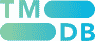)](https://developers.themoviedb.org/3)